### Parte 1 Analisis estadistico descriptivo

In [42]:
!pip install pandas numpy matplotlib seaborn openpyxl


  Using cached matplotlib-3.10.1-cp312-cp312-win_amd64.whl.metadata (11 kB)
Using cached matplotlib-3.10.1-cp312-cp312-win_amd64.whl (8.1 MB)


ERROR: Could not install packages due to an OSError: [WinError 32] El proceso no tiene acceso al archivo porque está siendo utilizado por otro proceso: 'C:\\Users\\aluce\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
Consider using the `--user` option or check the permissions.



### Verificación de la ubicación del documento .xlsx

In [43]:
import pandas as pd

# Ruta al archivo
ruta_archivo = r'C:\Users\aluce\Downloads\Diagnostics.xlsx'  # La "r" es para evitar problemas con las barras invertidas

# Cargar el archivo en un DataFrame
df = pd.read_excel(ruta_archivo)

# Mostrar las primeras filas
df.head()
df['AgeGroup'] = pd.cut(df['PatientAge'], bins=[0, 20, 40, 60, 80, 100], 
                        labels=['0-20', '21-40', '41-60', '61-80', '81-100'])


###  1. ¿Qué tipo de arritmias son más prevalentes?


1. ¿Qué tipo de arritmias son más prevalentes?
La arritmia más prevalente es 'SB' con 3889 casos (36.5%).


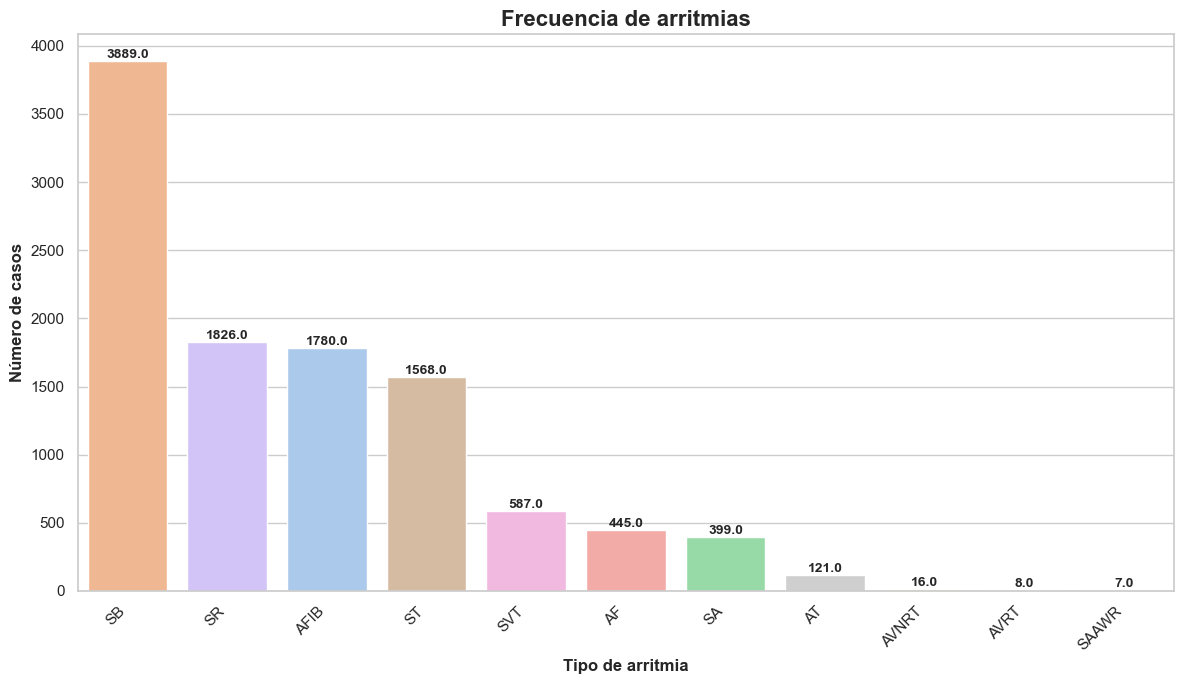

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n1. ¿Qué tipo de arritmias son más prevalentes?")
rhythm_counts = df['Rhythm'].value_counts()
top_rhythm = rhythm_counts.idxmax()
top_count = rhythm_counts.max()
total = rhythm_counts.sum()
print(f"La arritmia más prevalente es '{top_rhythm}' con {top_count} casos ({top_count/total:.1%}).")

plt.figure(figsize=(12, 7))
sns.set_theme(style="whitegrid")

# Graficar
ax = sns.countplot(data=df, x='Rhythm', hue='Rhythm', order=rhythm_counts.index, palette="pastel", legend=False)

# Añadir etiquetas encima de cada barra
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom',
                fontsize=10, fontweight='bold')

# Estética del gráfico
plt.title("Frecuencia de arritmias", fontsize=16, fontweight='bold')
plt.xlabel("Tipo de arritmia", fontsize=12, fontweight='bold')
plt.ylabel("Número de casos", fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


### ¿Hay arritmias que son más prevalentes para un género específico?

En FEMALE, la arritmia más común es 'SB' con un 30.0%.
En MALE, la arritmia más común es 'SB' con un 41.7%.

Comparación directa por tipo de arritmia:
La arritmia 'AF' es más común en MALE (4.0% FEMALE vs 4.3% MALE).
La arritmia 'AFIB' es más común en MALE (15.8% FEMALE vs 17.5% MALE).
La arritmia 'AT' es más común en FEMALE (1.2% FEMALE vs 1.1% MALE).
La arritmia 'AVNRT' es más común en FEMALE (0.3% FEMALE vs 0.1% MALE).
La arritmia 'AVRT' es más común en MALE (0.1% FEMALE vs 0.1% MALE).
La arritmia 'SA' es más común en FEMALE (3.8% FEMALE vs 3.7% MALE).
La arritmia 'SAAWR' es más común en FEMALE (0.1% FEMALE vs 0.0% MALE).
La arritmia 'SB' es más común en MALE (30.0% FEMALE vs 41.7% MALE).
La arritmia 'SR' es más común en FEMALE (21.8% FEMALE vs 13.5% MALE).
La arritmia 'ST' es más común en FEMALE (16.4% FEMALE vs 13.4% MALE).
La arritmia 'SVT' es más común en FEMALE (6.6% FEMALE vs 4.7% MALE).


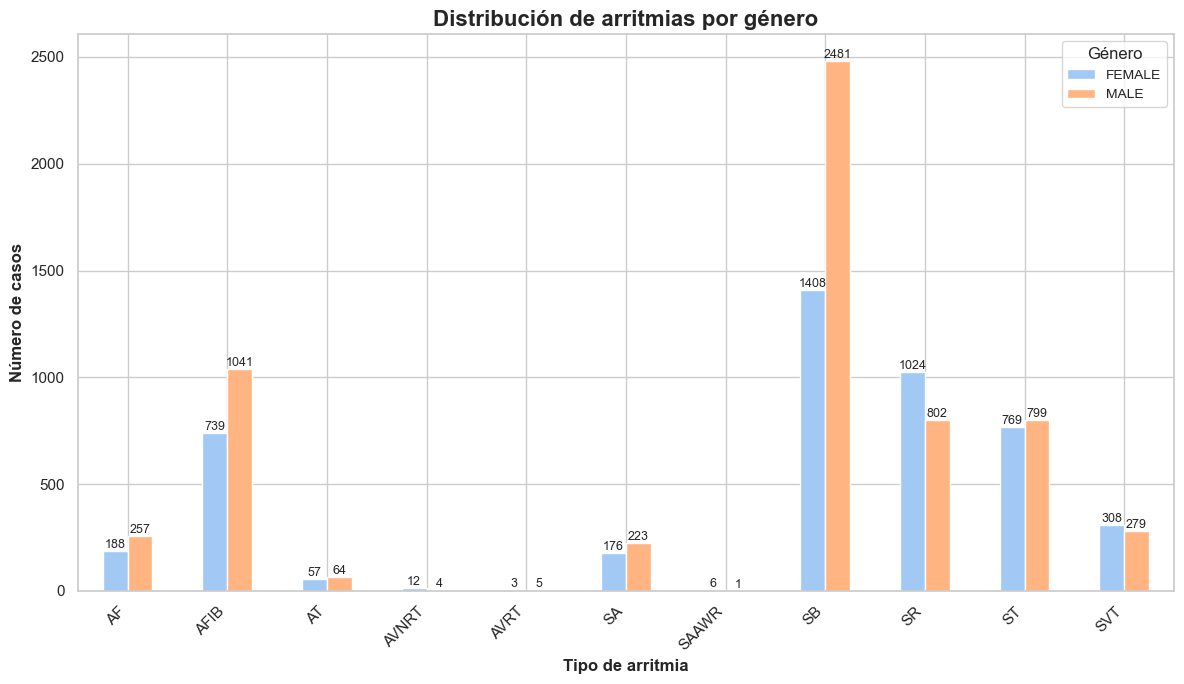

In [45]:
# Calcular distribución de arritmias por género
gender_rhythm = df.groupby('Gender')['Rhythm'].value_counts().unstack().fillna(0)
gender_rhythm_percent = gender_rhythm.div(gender_rhythm.sum(axis=1), axis=0) * 100

# Análisis e impresión de resultados
for gender in gender_rhythm_percent.index:
    most_common = gender_rhythm_percent.loc[gender].idxmax()
    percentage = gender_rhythm_percent.loc[gender].max()
    print(f"En {gender}, la arritmia más común es '{most_common}' con un {percentage:.1f}%.")

# Comparación directa entre géneros
print("\nComparación directa por tipo de arritmia:")
for rhythm in gender_rhythm.columns:
    female_val = gender_rhythm_percent.loc['FEMALE', rhythm]
    male_val = gender_rhythm_percent.loc['MALE', rhythm]
    more_common = "ambos por igual"
    if female_val > male_val:
        more_common = "FEMALE"
    elif male_val > female_val:
        more_common = "MALE"
    print(f"La arritmia '{rhythm}' es más común en {more_common} ({female_val:.1f}% FEMALE vs {male_val:.1f}% MALE).")

# Visualización
ax = gender_rhythm.T.plot(kind='bar', figsize=(12, 7), color=sns.color_palette("pastel"))

plt.title("Distribución de arritmias por género", fontsize=16, fontweight='bold')
plt.ylabel("Número de casos", fontsize=12, fontweight='bold')
plt.xlabel("Tipo de arritmia", fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Género', fontsize=10)
plt.tight_layout()

# Agregar etiquetas con número de casos sobre las barras
for bars in ax.containers:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                        (bar.get_x() + bar.get_width() / 2, height),
                        ha='center', va='bottom', fontsize=9)

plt.show()


### ¿Hay arritmias que son más prevalentes para una edad?

 En el grupo de edad 0-20, la arritmia más prevalente es 'SA' con 143 casos.
 En el grupo de edad 21-40, la arritmia más prevalente es 'SB' con 364 casos.
 En el grupo de edad 41-60, la arritmia más prevalente es 'SB' con 1639 casos.
 En el grupo de edad 61-80, la arritmia más prevalente es 'SB' con 1664 casos.
 En el grupo de edad 81-100, la arritmia más prevalente es 'AFIB' con 530 casos.


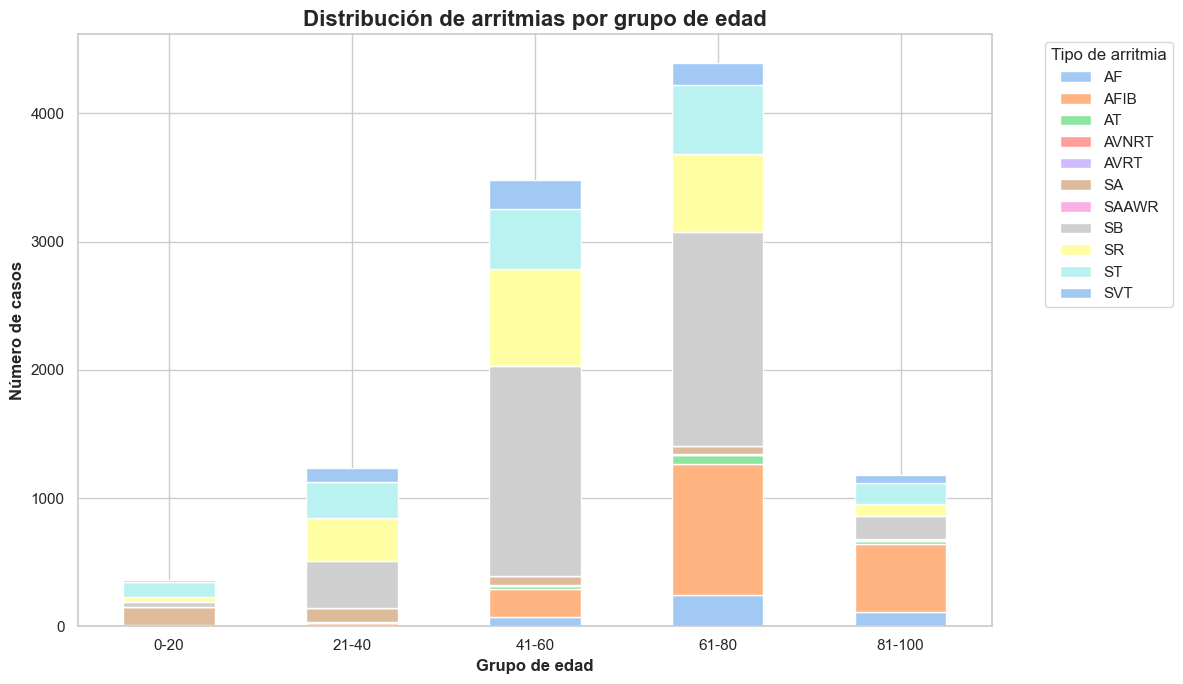

In [46]:
# Agrupación por grupos de edad y tipos de arritmia
age_rhythm = df.groupby('AgeGroup', observed=True)['Rhythm'].value_counts().unstack().fillna(0)

# Análisis por grupo de edad
for age_group in age_rhythm.index:
    most_common = age_rhythm.loc[age_group].idxmax()
    count = int(age_rhythm.loc[age_group].max())
    print(f" En el grupo de edad {age_group}, la arritmia más prevalente es '{most_common}' con {count} casos.")

# Visualización de distribución
ax = age_rhythm.plot(kind='bar', stacked=True, figsize=(12, 7), color=sns.color_palette("pastel"))


plt.title("Distribución de arritmias por grupo de edad", fontsize=16, fontweight='bold')
plt.ylabel("Número de casos", fontsize=12, fontweight='bold')
plt.xlabel("Grupo de edad", fontsize=12, fontweight='bold')
plt.xticks(rotation=0)
plt.legend(title="Tipo de arritmia", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### 4. ¿Qué datos se pueden usar para entrenar modelos?

In [47]:
top4_rhythms = rhythm_counts.head(4).index.tolist()
age_distribution = df['AgeGroup'].value_counts().sort_index()

print("Se recomienda usar los rangos de edad con más registros:")
print(age_distribution.to_string())

print(f"\nY enfocarse en estas arritmias más comunes: {top4_rhythms}")

# Explicación basada en los análisis anteriores
print("\nJustificación:")
print("- Al entrenar modelos, es importante contar con una cantidad suficiente de datos por categoría para evitar sesgos.")
print("- Los grupos de edad con más registros permiten entrenar modelos más robustos y generalizables.")
print("- Las arritmias más comunes ('" + "', '".join(top4_rhythms) + "') representan la mayoría de los casos del dataset, lo cual facilita entrenar un modelo con buen rendimiento.")
print("- Además, según los análisis anteriores, estas arritmias aparecen como las más prevalentes tanto en general como en los distintos géneros y grupos de edad, por lo que son relevantes clínicamente.")
print("\n Conclusión:")
print("- Aunque el género muestra ciertas diferencias en tipos de arritmia, no es tan determinante como la edad y las variables fisiológicas.")
print("- Es más efectivo seleccionar grupos etarios bien representados y centrarse en arritmias comunes.")
print("- Un análisis de importancia de variables (como Random Forest) puede confirmar qué atributos tienen mayor poder predictivo.")
print("- Si en el futuro se encuentran diferencias clínicas marcadas por género, se puede entrenar un modelo separado para cada uno.")



Se recomienda usar los rangos de edad con más registros:
AgeGroup
0-20       359
21-40     1231
41-60     3478
61-80     4395
81-100    1183

Y enfocarse en estas arritmias más comunes: ['SB', 'SR', 'AFIB', 'ST']

Justificación:
- Al entrenar modelos, es importante contar con una cantidad suficiente de datos por categoría para evitar sesgos.
- Los grupos de edad con más registros permiten entrenar modelos más robustos y generalizables.
- Las arritmias más comunes ('SB', 'SR', 'AFIB', 'ST') representan la mayoría de los casos del dataset, lo cual facilita entrenar un modelo con buen rendimiento.
- Además, según los análisis anteriores, estas arritmias aparecen como las más prevalentes tanto en general como en los distintos géneros y grupos de edad, por lo que son relevantes clínicamente.

 Conclusión:
- Aunque el género muestra ciertas diferencias en tipos de arritmia, no es tan determinante como la edad y las variables fisiológicas.
- Es más efectivo seleccionar grupos etarios bien rep

### 5. ¿Coincide con la literatura?


📊 Distribución de tipos de arritmia por género (%):
 Rhythm   AF  AFIB   AT  AVNRT  AVRT   SA  SAAWR    SB    SR    ST  SVT
Gender                                                                
FEMALE  4.0  15.8  1.2    0.3   0.1  3.8    0.1  30.0  21.8  16.4  6.6
MALE    4.3  17.5  1.1    0.1   0.1  3.7    0.0  41.7  13.5  13.4  4.7


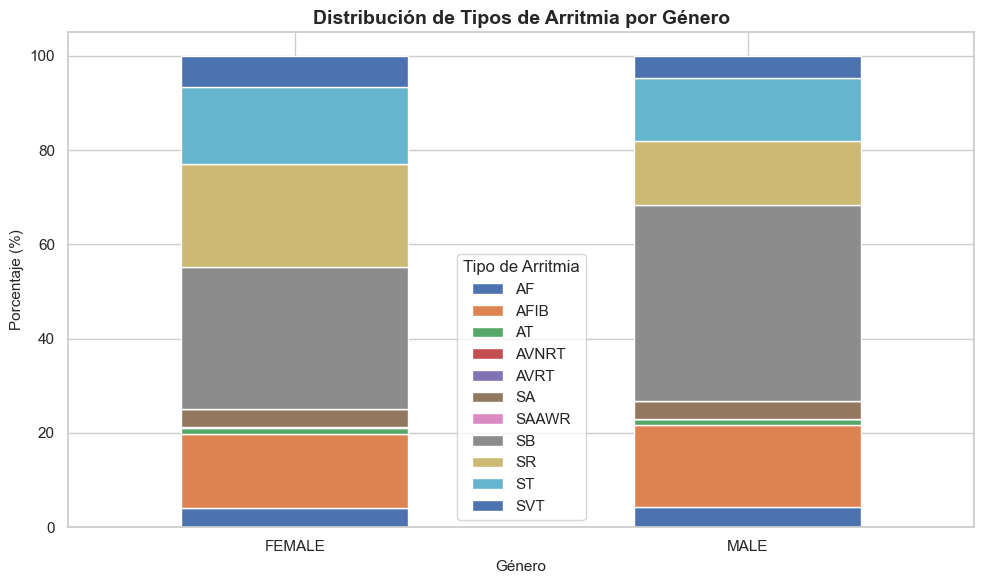


📊 Distribución de tipos de arritmia por grupo de edad (%):
 Rhythm     AF  AFIB   AT  AVNRT  AVRT    SA  SAAWR    SB    SR    ST  SVT
AgeGroup                                                                 
0-20      0.0   0.0  1.7    0.0   0.0  39.8    0.6  11.1  10.0  32.6  4.2
21-40     1.1   0.8  0.6    0.2   0.1   8.9    0.1  29.6  27.2  22.5  8.9
41-60     2.2   6.3  0.5    0.2   0.1   2.1    0.0  47.1  21.6  13.6  6.4
61-80     5.6  23.3  1.5    0.1   0.1   1.5    0.0  37.9  13.9  12.1  4.1
81-100    9.5  44.8  1.9    0.3   0.0   0.7    0.2  15.4   7.7  14.2  5.4


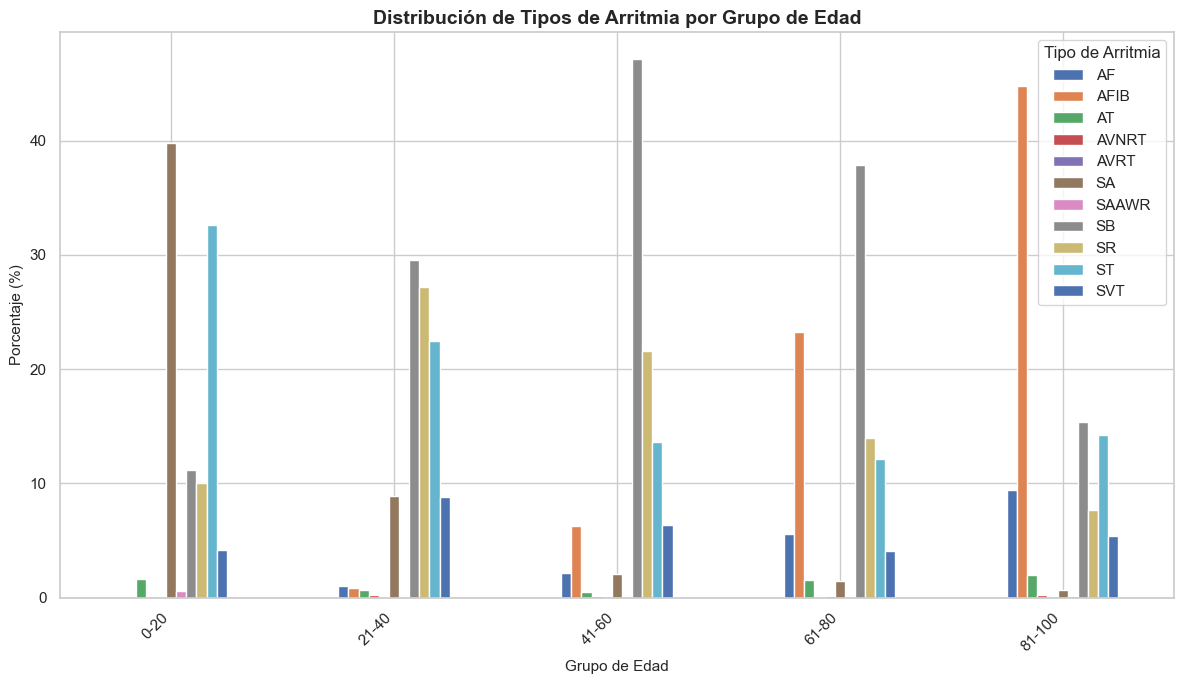

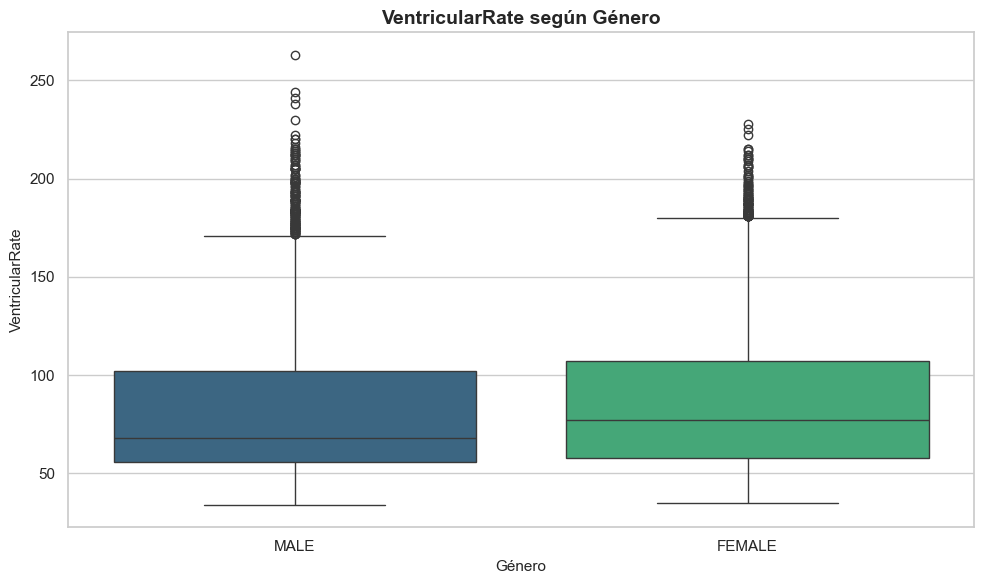

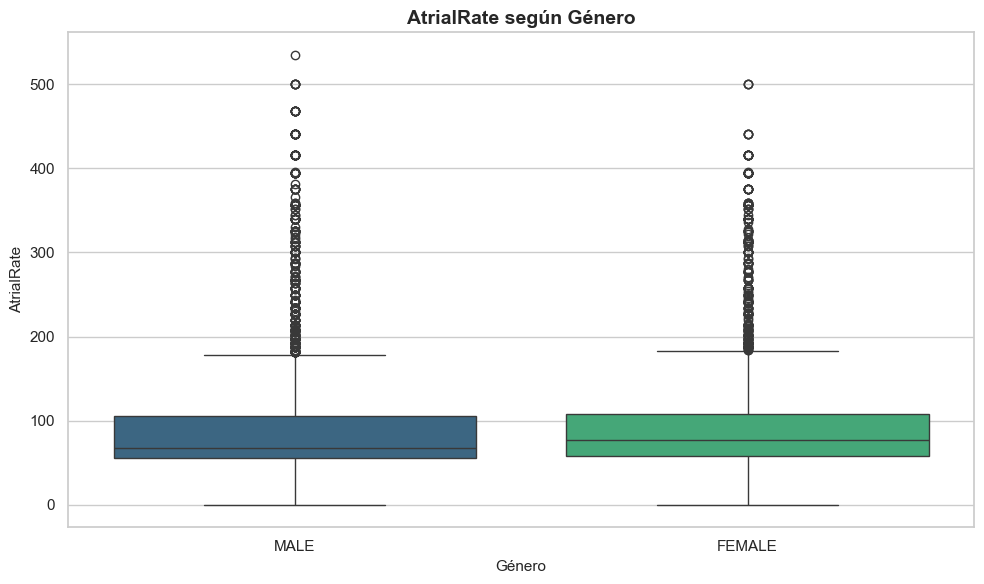

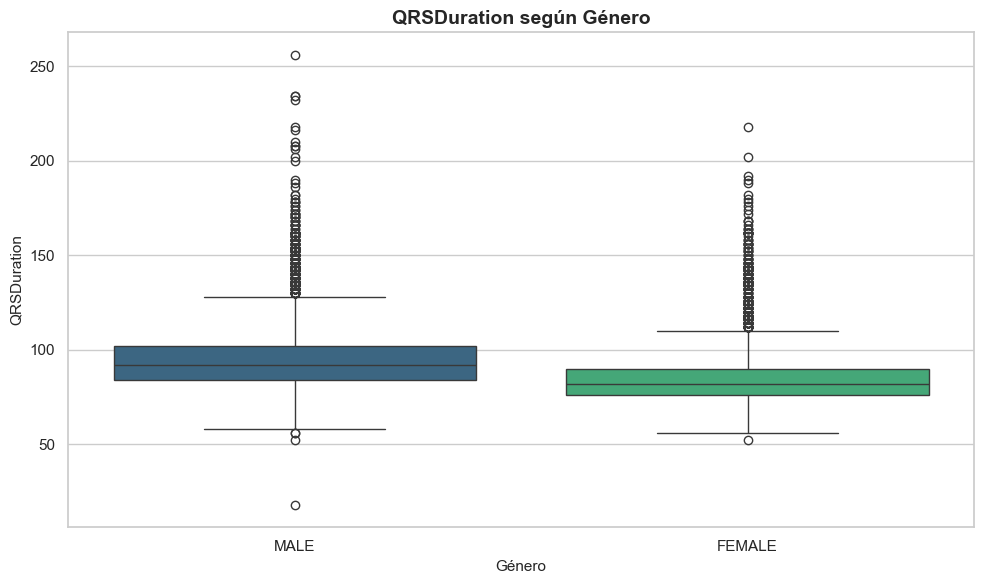

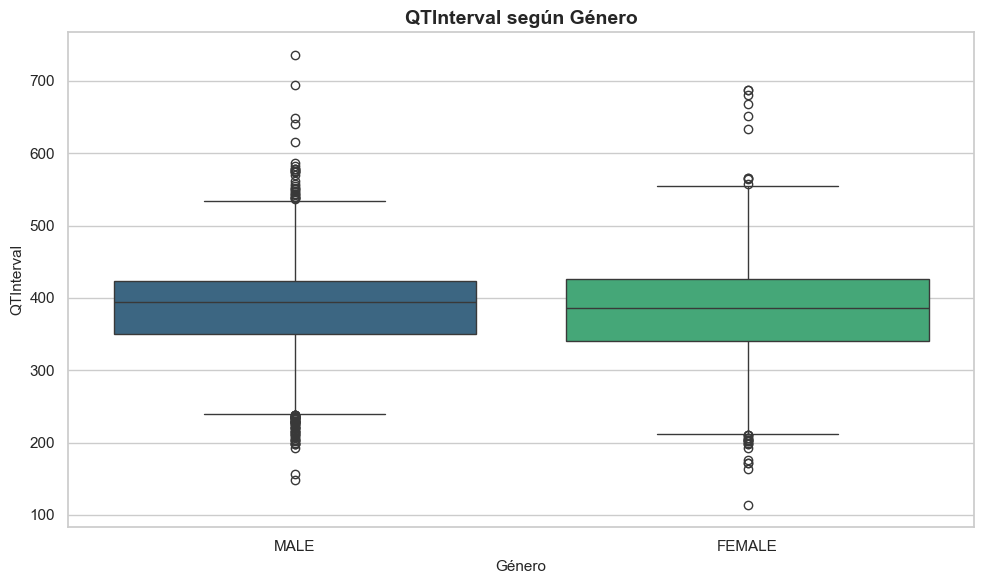

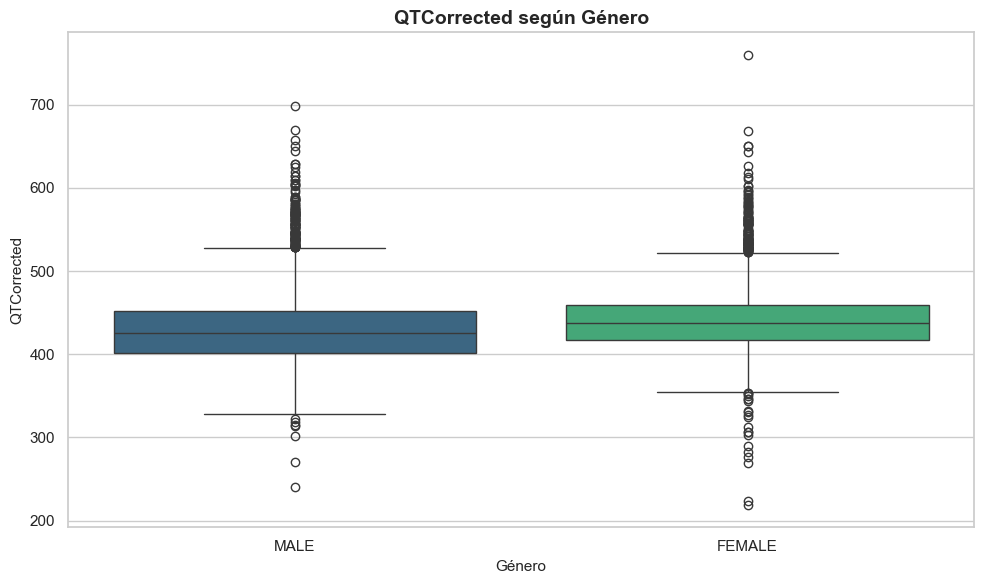

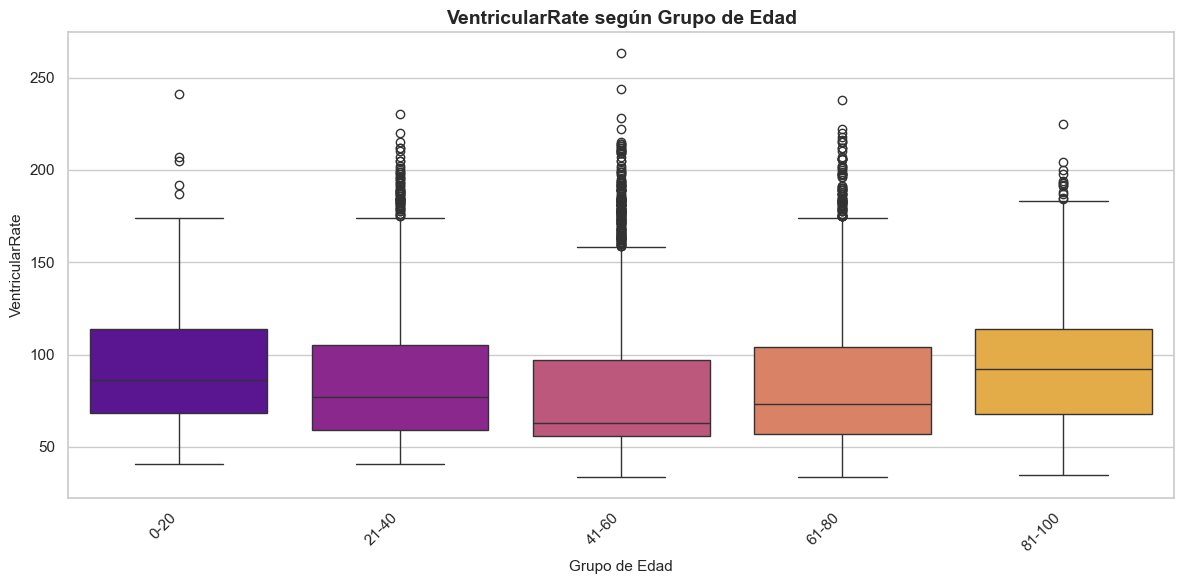

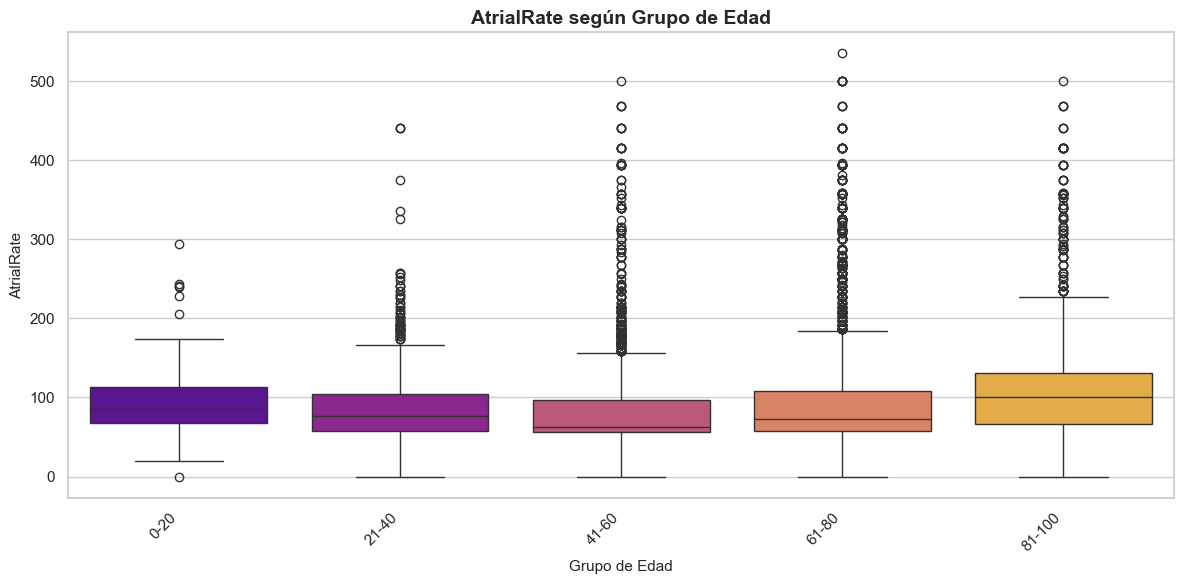

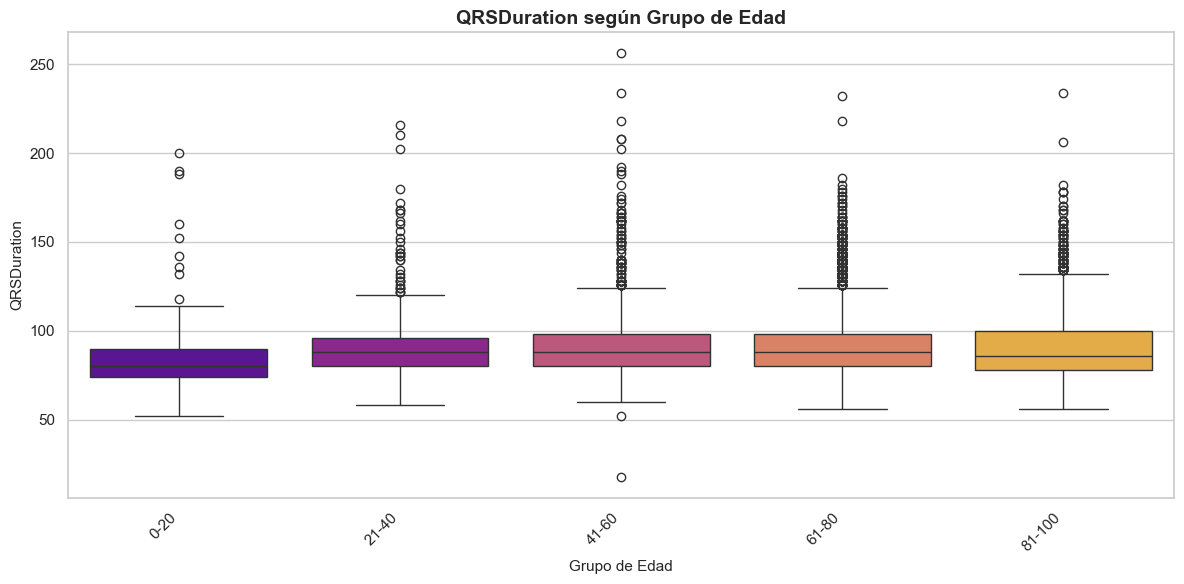

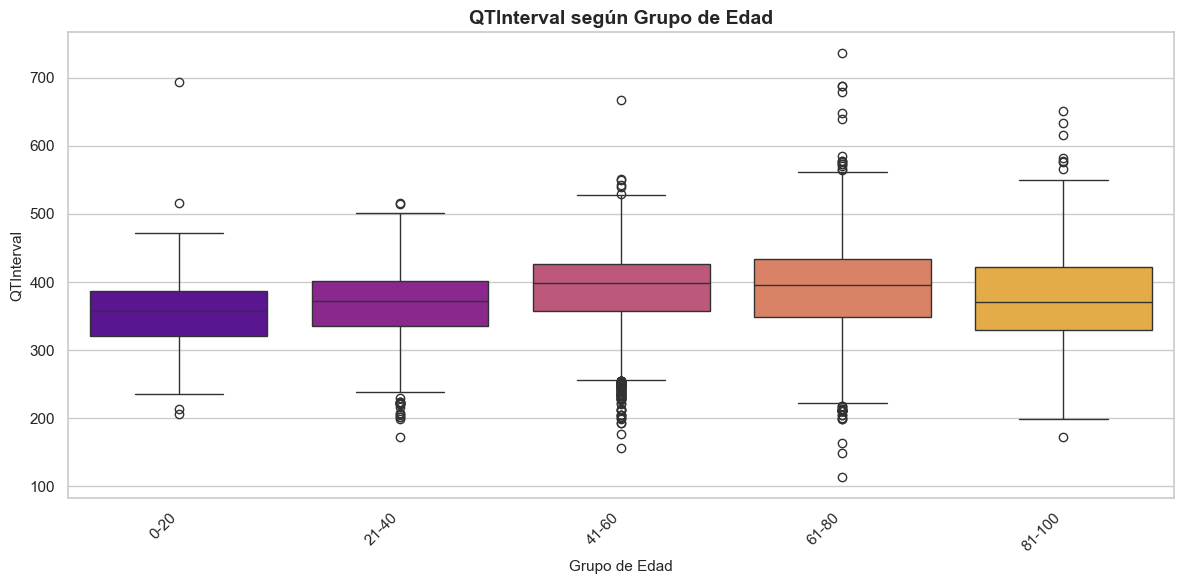

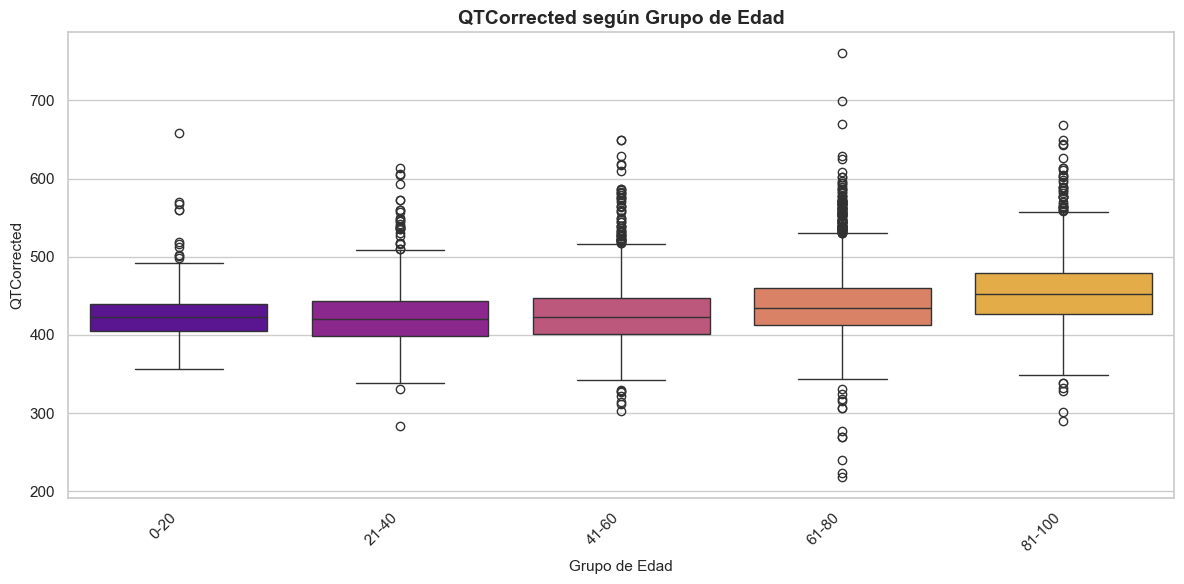


📊 Correlación entre variables fisiológicas (Heatmap):


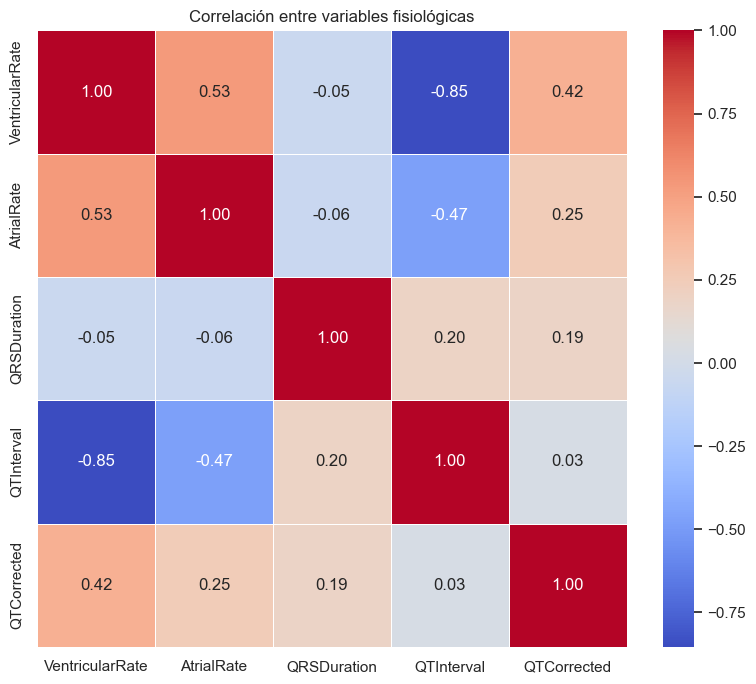

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que tu DataFrame se llama 'df' y tiene columnas 'Gender', 'AgeGroup', 'Rhythm' y las variables fisiológicas en numeric_cols

# Variables fisiológicas
numeric_cols = ['VentricularRate', 'AtrialRate', 'QRSDuration', 'QTInterval', 'QTCorrected']

# 1. Distribución de Tipos de Arritmia por Género
gender_rhythm_counts = pd.crosstab(df['Gender'], df['Rhythm'])
gender_rhythm_percentages = gender_rhythm_counts.apply(lambda x: x/x.sum() * 100, axis=1)
print("\n📊 Distribución de tipos de arritmia por género (%):\n", gender_rhythm_percentages.round(1).to_string())

# Visualización
gender_rhythm_percentages.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Distribución de Tipos de Arritmia por Género", fontsize=14, fontweight='bold')
plt.xlabel("Género", fontsize=11)
plt.ylabel("Porcentaje (%)", fontsize=11)
plt.xticks(rotation=0)
plt.legend(title='Tipo de Arritmia')
plt.tight_layout()
plt.show()

# 2. Distribución de Tipos de Arritmia por Grupo de Edad
age_group_rhythm_counts = pd.crosstab(df['AgeGroup'], df['Rhythm'])
age_group_rhythm_percentages = age_group_rhythm_counts.apply(lambda x: x/x.sum() * 100, axis=1)
print("\n📊 Distribución de tipos de arritmia por grupo de edad (%):\n", age_group_rhythm_percentages.round(1).to_string())

# Visualización
age_group_rhythm_percentages.plot(kind='bar', figsize=(12, 7))
plt.title("Distribución de Tipos de Arritmia por Grupo de Edad", fontsize=14, fontweight='bold')
plt.xlabel("Grupo de Edad", fontsize=11)
plt.ylabel("Porcentaje (%)", fontsize=11)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de Arritmia')
plt.tight_layout()
plt.show()

# 3. Análisis de las Variables Fisiológicas por Género (Corregido para el warning)
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Gender', y=col, hue='Gender', palette="viridis", legend=False)
    plt.title(f"{col} según Género", fontsize=14, fontweight='bold')
    plt.xlabel("Género", fontsize=11)
    plt.ylabel(col, fontsize=11)
    plt.tight_layout()
    plt.show()

# 4. Análisis de las Variables Fisiológicas por Grupo de Edad (Corregido para el warning)
for col in numeric_cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='AgeGroup', y=col, hue='AgeGroup', palette="plasma", legend=False)
    plt.title(f"{col} según Grupo de Edad", fontsize=14, fontweight='bold')
    plt.xlabel("Grupo de Edad", fontsize=11)
    plt.ylabel(col, fontsize=11)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

print("\n📊 Correlación entre variables fisiológicas (Heatmap):")
plt.figure(figsize=(8, 7))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlación entre variables fisiológicas")
plt.tight_layout()
plt.show()

### Análisis General de los Resultados

Este análisis exploratorio ha investigado la distribución de arritmias y las características fisiológicas (frecuencia ventricular, frecuencia atrial, duración del QRS, intervalo QT e intervalo QT corregido) en relación con el género y los grupos de edad, además de la correlación entre las propias variables fisiológicas. A continuación, se presenta un resumen general de los hallazgos:

### Distribución de Arritmias por Género:

La arritmia más prevalente en ambos géneros fue el Ritmo Sinusal (SR), seguido por la Fibrilación Auricular (AFIB).
Se observaron diferencias proporcionales: la AFIB pareció ser más común en mujeres, mientras que el SR, el Paro Sinoatrial (SA), la Taquicardia Sinusal (ST) y la Taquicardia Supraventricular (SVT) mostraron una ligera mayor proporción en hombres.
Distribución de Arritmias por Grupo de Edad:

La distribución de los tipos de arritmia varió significativamente entre los grupos de edad.
La Taquicardia Sinusal (ST) y la Taquicardia Supraventricular (SVT) fueron relativamente más comunes en el grupo de edad más joven (0-20 años).
La Fibrilación Auricular (AFIB) mostró una prevalencia creciente con la edad, siendo más prominente en los grupos de edad media y avanzada (41-80 años).
El Ritmo Sinusal (SR) fue una representación importante en todos los grupos de edad, aunque su proporción relativa disminuyó en los grupos mayores a medida que otras arritmias se volvieron más frecuentes.

### Variables Fisiológicas y Género:

Frecuencia Atrial: No se observaron diferencias notables en la tendencia central o la dispersión de la frecuencia atrial entre hombres y mujeres.
Duración del QRS: Los hombres tendieron a tener una duración del QRS ligeramente mayor y una mayor variabilidad en comparación con las mujeres. También se observó una mayor presencia de valores extremos altos en los hombres.
Intervalo QT: No se observaron diferencias notables en la tendencia central o la dispersión del intervalo QT entre hombres y mujeres.
Intervalo QT Corregido (QTc): Similar al intervalo QT no corregido, no se apreciaron diferencias significativas en la tendencia central o la dispersión del QTc entre hombres y mujeres, sugiriendo un riesgo intrínseco de arritmias ventriculares comparable entre los géneros en esta muestra.
Variables Fisiológicas y Grupo de Edad:

Frecuencia Ventricular: La mediana mostró una ligera variación entre los grupos de edad, con una tendencia a ser ligeramente más alta en el grupo más joven y ligeramente más baja en el grupo de edad media. La dispersión y la presencia de outliers altos aumentaron con la edad.
Frecuencia Atrial: La mediana mostró una ligera variación, con una tendencia a ser más alta en el grupo más joven y a aumentar ligeramente en los grupos de mayor edad. La dispersión y los outliers altos aumentaron significativamente con la edad, lo que se asoció con una mayor prevalencia de taquiarritmias atriales.
Duración del QRS: Se observó una ligera tendencia al aumento de la mediana y un aumento en la dispersión y los outliers altos con el envejecimiento, lo que podría reflejar cambios en el sistema de conducción ventricular.
Intervalo QT: La mediana mostró una ligera tendencia al aumento con la edad, y la dispersión y los outliers largos también aumentaron en los grupos de mayor edad.
Intervalo QT Corregido (QTc): La mediana del QTc mostró una ligera tendencia al aumento en los grupos de mayor edad, y la dispersión y los outliers largos (indicativos de un mayor riesgo de arritmias ventriculares) también aumentaron con el envejecimiento.
### Correlación entre Variables Fisiológicas:

El análisis de correlación reveló relaciones lineales significativas entre algunas de las variables fisiológicas:
Se observó una correlación positiva moderada a fuerte entre la Duración del QRS y el Intervalo QT, lo que sugiere que una mayor duración de la despolarización ventricular se asocia con una mayor duración de la repolarización ventricular.
El Intervalo QT mostró una correlación positiva fuerte con el Intervalo QT Corregido (QTc), aunque la magnitud exacta depende del método de corrección de la frecuencia cardíaca utilizado.
La Frecuencia Ventricular y la Frecuencia Atrial mostraron una correlación positiva moderada, lo que podría reflejar la conducción 1:1 en ritmos sinusales, aunque esta relación podría ser más compleja en presencia de arritmias.
Se observaron correlaciones débiles o no significativas entre las frecuencias (ventricular y atrial) y la duración del QRS o los intervalos QT, lo que indica que la frecuencia cardíaca no está fuertemente linealmente relacionada con la duración de la despolarización o repolarización ventricular en esta población general.
Implicaciones Generales (Incluyendo Correlaciones):

El género y la edad influyen en la prevalencia de arritmias y los valores de las variables fisiológicas.
La edad se asocia con cambios en la distribución de arritmias y alteraciones en la conducción y repolarización ventricular, aumentando potencialmente el riesgo arrítmico.
Las correlaciones significativas entre la duración del QRS y el intervalo QT subrayan la interdependencia de los procesos de despolarización y repolarización ventricular. La fuerte correlación entre el QT y el QTc valida la corrección por la frecuencia cardíaca. Las correlaciones entre las frecuencias reflejan la actividad eléctrica coordinada del corazón.

### Próximos Pasos Recomendados:

Análisis Estadístico Formal: Realizar pruebas de significancia estadística para confirmar las diferencias observadas y evaluar la fuerza de las asociaciones y correlaciones.
Modelado Multivariado: Investigar la interacción entre el género, la edad, los tipos de arritmia y las variables fisiológicas, considerando las correlaciones entre estas últimas para identificar predictores de riesgo o características específicas de las arritmias.
Análisis Específico por Tipo de Arritmia: Examinar las correlaciones entre las variables fisiológicas dentro de cada tipo de arritmia, ya que estas relaciones podrían variar según la condición arrítmica subyacente.
Consideración de Factores Clínicos: Incorporar información clínica adicional para obtener una comprensión más completa de los factores que influyen en las relaciones observadas.

Este análisis integral proporciona una visión detallada de las complejas interacciones entre las variables demográficas, la ocurrencia de arritmias y las características electrofisiológicas del corazón. Los hallazgos sugieren varias vías para futuras investigaciones que podrían mejorar la comprensión, el diagnóstico y el manejo de las arritmias.